<a href="https://colab.research.google.com/github/AJITHKANNAN/Deep-Learning-Tutorials/blob/main/CNN__Cifar_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

import warnings

warnings.filterwarnings('ignore')

# Load the dataset

In [11]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [12]:
X_test.shape


(10000, 32, 32, 3)

# Here we see there are 50000 training images and 10000 test images



In [13]:
y_train.shape

(50000, 1)

In [14]:
y_test.shape

(10000, 1)

In [15]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

# y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array


In [16]:

y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [18]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

From Cifar we can have some classes in the documentations

https://www.cs.toronto.edu/~kriz/cifar.html

In [19]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


In [24]:
# Let's plot some images to see what they are

def plot_sample(X, y, index):
    plt.figure(figsize = (15,3))

    plt.imshow(X[index])  #shows the image

    plt.xlabel(classes[y[index]])

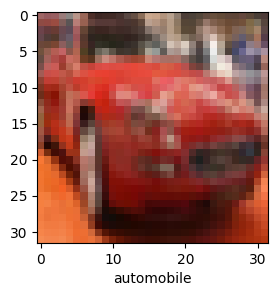

In [26]:
plot_sample(X_train, y_train, 5)


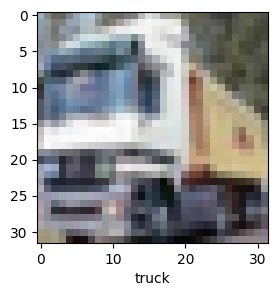

In [27]:
plot_sample(X_train, y_train, 1)


# Normalize the images to a number from 0 to 1.
# Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255.
# Hence to normalize in 0-->1 range, we need to divide it by 255

In [28]:
# Normalizing the training data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Build simple artificial neural network for image classification


In [30]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),

        layers.Dense(300, activation='relu'),
        layers.Dense(100, activation='relu'),

        layers.Dense(10, activation='sigmoid')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 14s 8ms/step - loss: 1.8708 - accuracy: 0.3301
Epoch 2/5
1563/1563 [==============================] - 16s 10ms/step - loss: 1.6871 - accuracy: 0.4015
Epoch 3/5
1563/1563 [==============================] - 14s 9ms/step - loss: 1.6094 - accuracy: 0.4282
Epoch 4/5
1563/1563 [==============================] - 14s 9ms/step - loss: 1.5523 - accuracy: 0.4482
Epoch 5/5
1563/1563 [==============================] - 14s 9ms/step - loss: 1.5132 - accuracy: 0.4621


In [31]:
# You can see that at the end of 5 epochs, accuracy is at around 46%


In [32]:

from sklearn.metrics import confusion_matrix , classification_report
import numpy as np

y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

# np.argmax  - Returns the indices of the maximum values along an axis.

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 4ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.44      0.62      0.52      1000
           1       0.73      0.37      0.50      1000
           2       0.41      0.26      0.32      1000
           3       0.31      0.34      0.33      1000
           4       0.46      0.31      0.37      1000
           5       0.35      0.42      0.38      1000
           6       0.50      0.50      0.50      1000
           7       0.52      0.53      0.53      1000
           8       0.46      0.70      0.55      1000
           9       0.55      0.51      0.53      1000

    accuracy                           0.46     10000
   macro avg       0.47      0.46      0.45     10000
weighted avg       0.47      0.46      0.45     10000



In [36]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 3s 7ms/step - loss: 1.5222 - accuracy: 0.4571


[1.5222004652023315, 0.4571000039577484]

# Now let us build a convolutional neural network to train our images


In [33]:
cnn = models.Sequential([

    #CNN
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Dense layer
    layers.Flatten(),  # flattening to 1-D array
    layers.Dense(64, activation='relu'),  # Hidden layer
    layers.Dense(10, activation='softmax')
])

In [34]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [35]:
cnn.fit(X_train, y_train, epochs=10)


Epoch 1/10
1563/1563 [==============================] - 61s 38ms/step - loss: 1.4368 - accuracy: 0.4843
Epoch 2/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.0991 - accuracy: 0.6153
Epoch 3/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.9711 - accuracy: 0.6622
Epoch 4/10
1563/1563 [==============================] - 68s 43ms/step - loss: 0.8843 - accuracy: 0.6957
Epoch 5/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.8143 - accuracy: 0.7190
Epoch 6/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.7571 - accuracy: 0.7389
Epoch 7/10
1563/1563 [==============================] - 93s 59ms/step - loss: 0.7050 - accuracy: 0.7554
Epoch 8/10
1563/1563 [==============================] - 101s 65ms/step - loss: 0.6577 - accuracy: 0.7721
Epoch 9/10
1563/1563 [==============================] - 70s 44ms/step - loss: 0.6189 - accuracy: 0.7863
Epoch 10/10
1563/1563 [==============================] - 87s 56

With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN where it was only 46%.

CNN's are best for image classification and gives superb accuracy.

Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features



In [37]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.9481 - accuracy: 0.6962


[0.9480780363082886, 0.6962000131607056]

In [ ]:
X_test

In [39]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 5s 15ms/step


array([[2.57997672e-05, 7.77354799e-05, 5.66340517e-04, 9.25702453e-01,
        2.51887343e-03, 6.42951950e-02, 1.68459912e-04, 1.22052494e-04,
        6.44690730e-03, 7.62129639e-05],
       [2.91201053e-03, 9.31704324e-03, 2.19554568e-06, 3.65352935e-06,
        1.72911385e-09, 9.92599141e-08, 1.11983978e-09, 4.95651307e-08,
        9.87594485e-01, 1.70497864e-04],
       [4.07987200e-02, 1.95129678e-01, 2.00291211e-03, 2.46242597e-03,
        3.55382013e-04, 2.65136448e-04, 3.72018440e-05, 6.04313624e-04,
        7.38195062e-01, 2.01491099e-02],
       [9.42230403e-01, 3.46831839e-05, 1.56405121e-02, 9.22092644e-04,
        2.80052540e-04, 1.50135077e-06, 3.47786545e-06, 7.92564333e-06,
        4.08790037e-02, 3.73855841e-07],
       [5.88074336e-08, 1.11717127e-05, 1.48290419e-03, 3.15066660e-03,
        3.67914923e-02, 1.83107495e-05, 9.58545029e-01, 8.63630856e-09,
        4.82341193e-07, 6.26040908e-09]], dtype=float32)

In [47]:
y_classes = [np.argmax(element) for element in y_pred]  # np.argmax  -  Returns the indices of the maximum values along an axis.
y_classes[:5]

[3, 8, 8, 0, 6]

In [48]:
y_test[:5]


array([3, 8, 8, 0, 6], dtype=uint8)

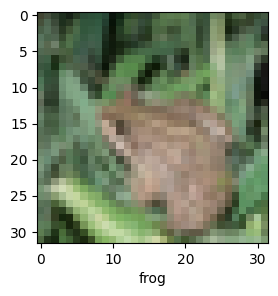

In [44]:
plot_sample(X_test, y_test,4)  # Actual data


In [49]:
classes[y_classes[4]]   # Predicted data


'frog'

In [46]:

from sklearn.metrics import confusion_matrix , classification_report
import numpy as np

y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

# np.argmax  - Returns the indices of the maximum values along an axis.

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 4s 11ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.70      0.77      0.74      1000
           1       0.87      0.74      0.80      1000
           2       0.61      0.61      0.61      1000
           3       0.47      0.57      0.51      1000
           4       0.67      0.63      0.65      1000
           5       0.60      0.60      0.60      1000
           6       0.78      0.72      0.75      1000
           7       0.78      0.72      0.75      1000
           8       0.81      0.79      0.80      1000
           9       0.75      0.81      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000

